In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print("数据基本信息：")
df_train.info()
print(df_train.columns)
# print(df_train.Age)
df_test.info()
print(df_test.columns)

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data column

In [7]:
missing = df_train.isnull().sum()
# print(missing)
missing_percentage = (missing / len(df_train)) * 100
print(missing_percentage)

# 筛选出有缺失值的列
missing_data = pd.DataFrame({'缺失值数量': missing, '缺失比例': missing_percentage})
missing_data=missing_data[missing_data['缺失值数量']>0].sort_values(by='缺失比例',ascending=False)

print("缺失值统计：")
print(missing_data)

# plt.figure(figsize=(10, 6))
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# plt.title('缺失值分布图')
# plt.show()


df_train['Cabin'] = df_train['Cabin'].fillna('Missing')



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
缺失值统计：
          缺失值数量       缺失比例
Cabin       687  77.104377
Age         177  19.865320
Embarked      2   0.224467


In [8]:

# 从Name列中提取头衔(Title)，例如"Mr.", "Mrs.", "Dr."等
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df_train['Title'])
# 计算每个头衔对应的年龄中位数
title_age_median = df_train.groupby('Title')['Age'].median()
# print(title_age_median)

# 填充函数
def fill_age(row):
    if pd.isnull(row['Age']):
        return title_age_median[row['Title']]
    return row['Age']

df_train['Age'] = df_train.apply(fill_age, axis=1)#按行操作


df_train['Cabin']=df_train['Cabin'].fillna('Missing')
print(df_train['Cabin'])
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
# print(df_train['Embarked'])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object
0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object


In [9]:
print(df_train.iloc[0:5,:])
df_train=df_train.drop('PassengerId',axis=1)
df_train.iloc[0:5,:]


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Title  
0      0         A/5 21171   7.2500  Missing        S    Mr  
1      0          PC 17599  71.2833      C85        C   Mrs  
2      0  STON/O2. 3101282   7.9250  Missing        S  Miss  
3      0            113803  53.1000     C123        S   Mrs  
4      0  

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,Mr


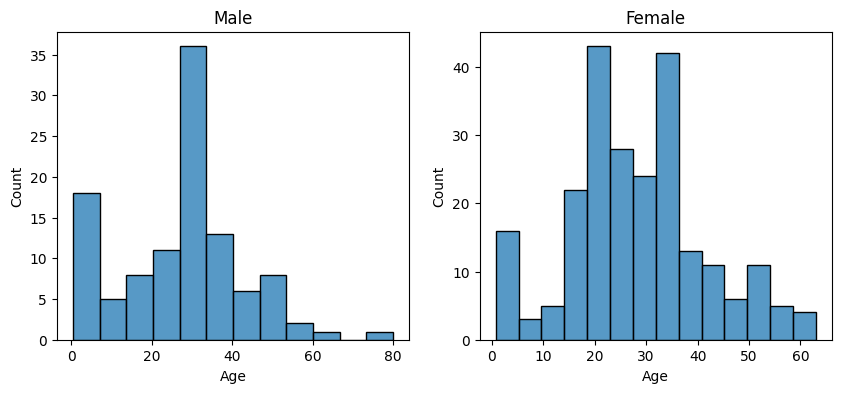

In [10]:
man=df_train[df_train['Sex']=='male'].loc[:,['Survived','Age']]
woman=df_train[df_train['Sex']=='female'].loc[:,['Survived','Age']]

# 创建 1 行 2 列的子图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# 绘制男性存活者的年龄分布
ax = sns.histplot(man[man['Survived'] == 1].Age,
                  label='Survived', ax=axes[0], kde=False)
ax.set_title('Male')

# 绘制女性存活者的年龄分布
_ax = sns.histplot(woman[woman['Survived'] == 1].Age,
                   label='Survived', ax=axes[1], kde=False)
_ax.set_title('Female')

plt.show()




In [11]:
print(df_train.columns)
print(df_train.columns.tolist())
df_train.drop('Cabin',axis=1,inplace=True)
df_train.drop('Name',axis=1,inplace=True)

df_test.drop('Cabin',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

print(df_train.head())

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')
['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title']
   Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Embarked Title  
0        S    Mr  
1        C   Mrs  
2        S  Miss  
3        S   Mrs  
4        S    Mr  


In [12]:
df_train=df_train.drop('Ticket',axis=1)

In [13]:
df_train=df_train.drop('Title',axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
embark_data=pd.get_dummies(df_train['Embarked']).astype(int)
print(embark_data)

     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[891 rows x 3 columns]


In [49]:
def data_process(data):
    embark_data=pd.get_dummies(data['Embarked']).astype(int)
    data=pd.concat([data,embark_data],axis=1)
    data.drop('Embarked',inplace=True,axis=1)

    data['Age']=(data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())


    data['Fare']=(data['Fare']-data['Fare'].min())/(data['Fare'].max(-data['Fare'].min()))
    gender={'female':0,'male':1}
    data['Sex']=data['Sex'].map(gender)
    data['Size']=data['SibSp']+data['Parch']+1
    data.drop('SibSp',inplace=True,axis=1)
    data.drop('Parch',inplace=True,axis=1)
    return data

df_train=data_process(df_train)
print(df_train.head())


df_train.to_csv('data_processed.csv')

KeyError: 'Embarked'

In [47]:
from sklearn.model_selection import train_test_split
label_train = df_train.loc[:, 'Survived']
data_train = df_train.drop(columns=['Survived'])

x_train,x_test,y_train,y_test=train_test_split(data_train,label_train,random_state=1,train_size=0.7)
print(y_train)

114    0
874    1
76     0
876    0
674    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 623, dtype: int64


In [19]:
from sklearn import svm

model = svm.SVC(kernel='rbf',                      # 核函数
               gamma=0.1,
             decision_function_shape='ovo',     
              C=1)
model.fit(x_train, y_train)    

print(model.score(x_test, y_test)) 
print(x_train.head())   
my_data1={'Pclass':1,'Sex':0,'Age':0.34,'SibSp':1,'Parch':2,'Fare':0.15,'C':1,"Q":0,'S':0}
my_data2=[[1,0,0.34,0.15,1,0,0,2]]
y_train_hat=model.predict(my_data2)
print(y_train_hat)

0.7877094972067039
     Pclass  Sex       Age      Fare  C  Q  S  Size
301       3    1  0.371701  0.045381  0  1  0     3
309       1    0  0.371701  0.111118  1  0  0     1
516       2    0  0.421965  0.020495  0  0  1     1
120       2    1  0.258608  0.143462  0  0  1     3
570       2    1  0.773813  0.020495  0  0  1     1
[1]


d:\anaconda\envs\DL\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier(n_estimators=200,)
RF.fit(x_train, y_train)
print(RF.score(x_test,y_test))
# RF.score(x_test, y_test)
y_train_hat=RF.predict(my_data2)
print(y_train_hat)

# 定义参数网格
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [2, 5,10,20]
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(
    estimator=RF,
    param_grid=param_grid,
    cv=5,                 # 5折交叉验证
    scoring='accuracy',   # 评估指标为准确率
    n_jobs=-1             # 使用所有CPU核
)

# 执行网格搜索
better_RF=grid_search.fit(x_train, y_train)
print(better_RF.best_params_)
print(better_RF.score(x_test,y_test))

0.753731343283582
[1]


d:\anaconda\envs\DL\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
0.7910447761194029


In [44]:
from sklearn.metrics import confusion_matrix, classification_report

pred_RFC = better_RF.predict(x_train)

# 混淆矩阵
print(confusion_matrix(y_train, pred_RFC))


[[434   9]
 [ 41 228]]


In [45]:
print(classification_report(y_train, pred_RFC))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       443
           1       0.96      0.85      0.90       269

    accuracy                           0.93       712
   macro avg       0.94      0.91      0.92       712
weighted avg       0.93      0.93      0.93       712



In [46]:
keys = ['Pclass', 'Sex', 'Age','Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Size']
values = RF.feature_importances_
my_dic=dict(zip(keys,values))
print(my_dic)
for i,j in my_dic.items():
    print(f'{i}的重要性为：{j*100}%')



{'Pclass': 0.08925449553666402, 'Sex': 0.2503363256297548, 'Age': 0.2746043817941959, 'Fare': 0.2685041192724406, 'Embarked_C': 0.01161475481350288, 'Embarked_Q': 0.009240101414894345, 'Embarked_S': 0.014207244380407548, 'Size': 0.0822385771581399}
Pclass的重要性为：8.925449553666402%
Sex的重要性为：25.033632562975477%
Age的重要性为：27.46043817941959%
Fare的重要性为：26.85041192724406%
Embarked_C的重要性为：1.1614754813502879%
Embarked_Q的重要性为：0.9240101414894345%
Embarked_S的重要性为：1.4207244380407549%
Size的重要性为：8.22385771581399%


In [ ]:
# # 数据转换
# df['col1'] = df['col1'].astype(float)  # 类型转换
# df['col3'] = df['col1'] + df['col2']  # 列计算
# df['col4'] = df['col1'].apply(lambda x: x * 2)  # 自定义计算

In [ ]:
import pandas as pd
import numpy as np

# 创建示例数据
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Value': [10, 20, 15, np.nan, 25, 30],
    'Count': [2, 4, 3, 1, 5, 2]
}
df = pd.DataFrame(data)
print(df)
# 1. 分组统计
grouped = df.groupby('Category')
print("各组平均值：")
print(grouped['Value'].mean())

# 2. 填充缺失值
df['Value'] = grouped['Value'].transform(lambda x: x.fillna(x.mean()))
print("\n填充缺失值后：")
print(df)

# 3. 多函数聚合
print("\n多函数聚合：")
print(grouped.agg({'Value': ['mean', 'sum'], 'Count': 'max'}))

# 4. 分组筛选
filtered = grouped.filter(lambda x: x['Value'].sum() > 30)
print("\n筛选后的数据：")
print(filtered)